# 1)- Handeling Missing Values

## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1.1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### 1.2 Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 1.3 Missing data not at random (MNAR) 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

## Examples

In [31]:
import seaborn
import pandas as pd

In [2]:
df = seaborn.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
## checking missing values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#checking no of missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#method 1: to delete the rows containing null values
#disadvantage: vast amount of data will be lost
print(df.shape)

(891, 15)


In [10]:
print(df.dropna().shape) #vast amount of data lost

(182, 15)


In [11]:
#method 2: deleting column, is possible in case of deck column(cuz 688 null values) but not in cage of age column. 
df.dropna(axis=1) #inplace =true for permanently changing

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values

### 1- Mean Value Imputation: 
Works will when we have a normally distributed data.

<Axes: xlabel='age', ylabel='Count'>

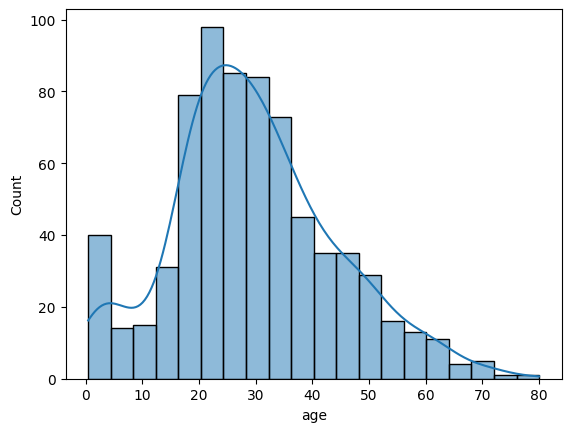

In [14]:
seaborn.histplot(df['age'],kde=True)

In [23]:
##as histplot looks somewhat like normal distribution therefore filling na with mean
df['Age_mean']=df['age'].fillna(df['age'].mean())
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2- Median value imputation
works well if we have outliers in the dataset.

In [35]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','Age_mean','age']]

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3- Mode Implementation Techniques
Work for **categorical veriables**

In [53]:
df['embarked_mode']=df['embarked'].fillna(df['embarked'].mode()[0])
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S


# -------------------------------------------------------------------------------------------------------------

# 2)-Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling
3. SMOTE

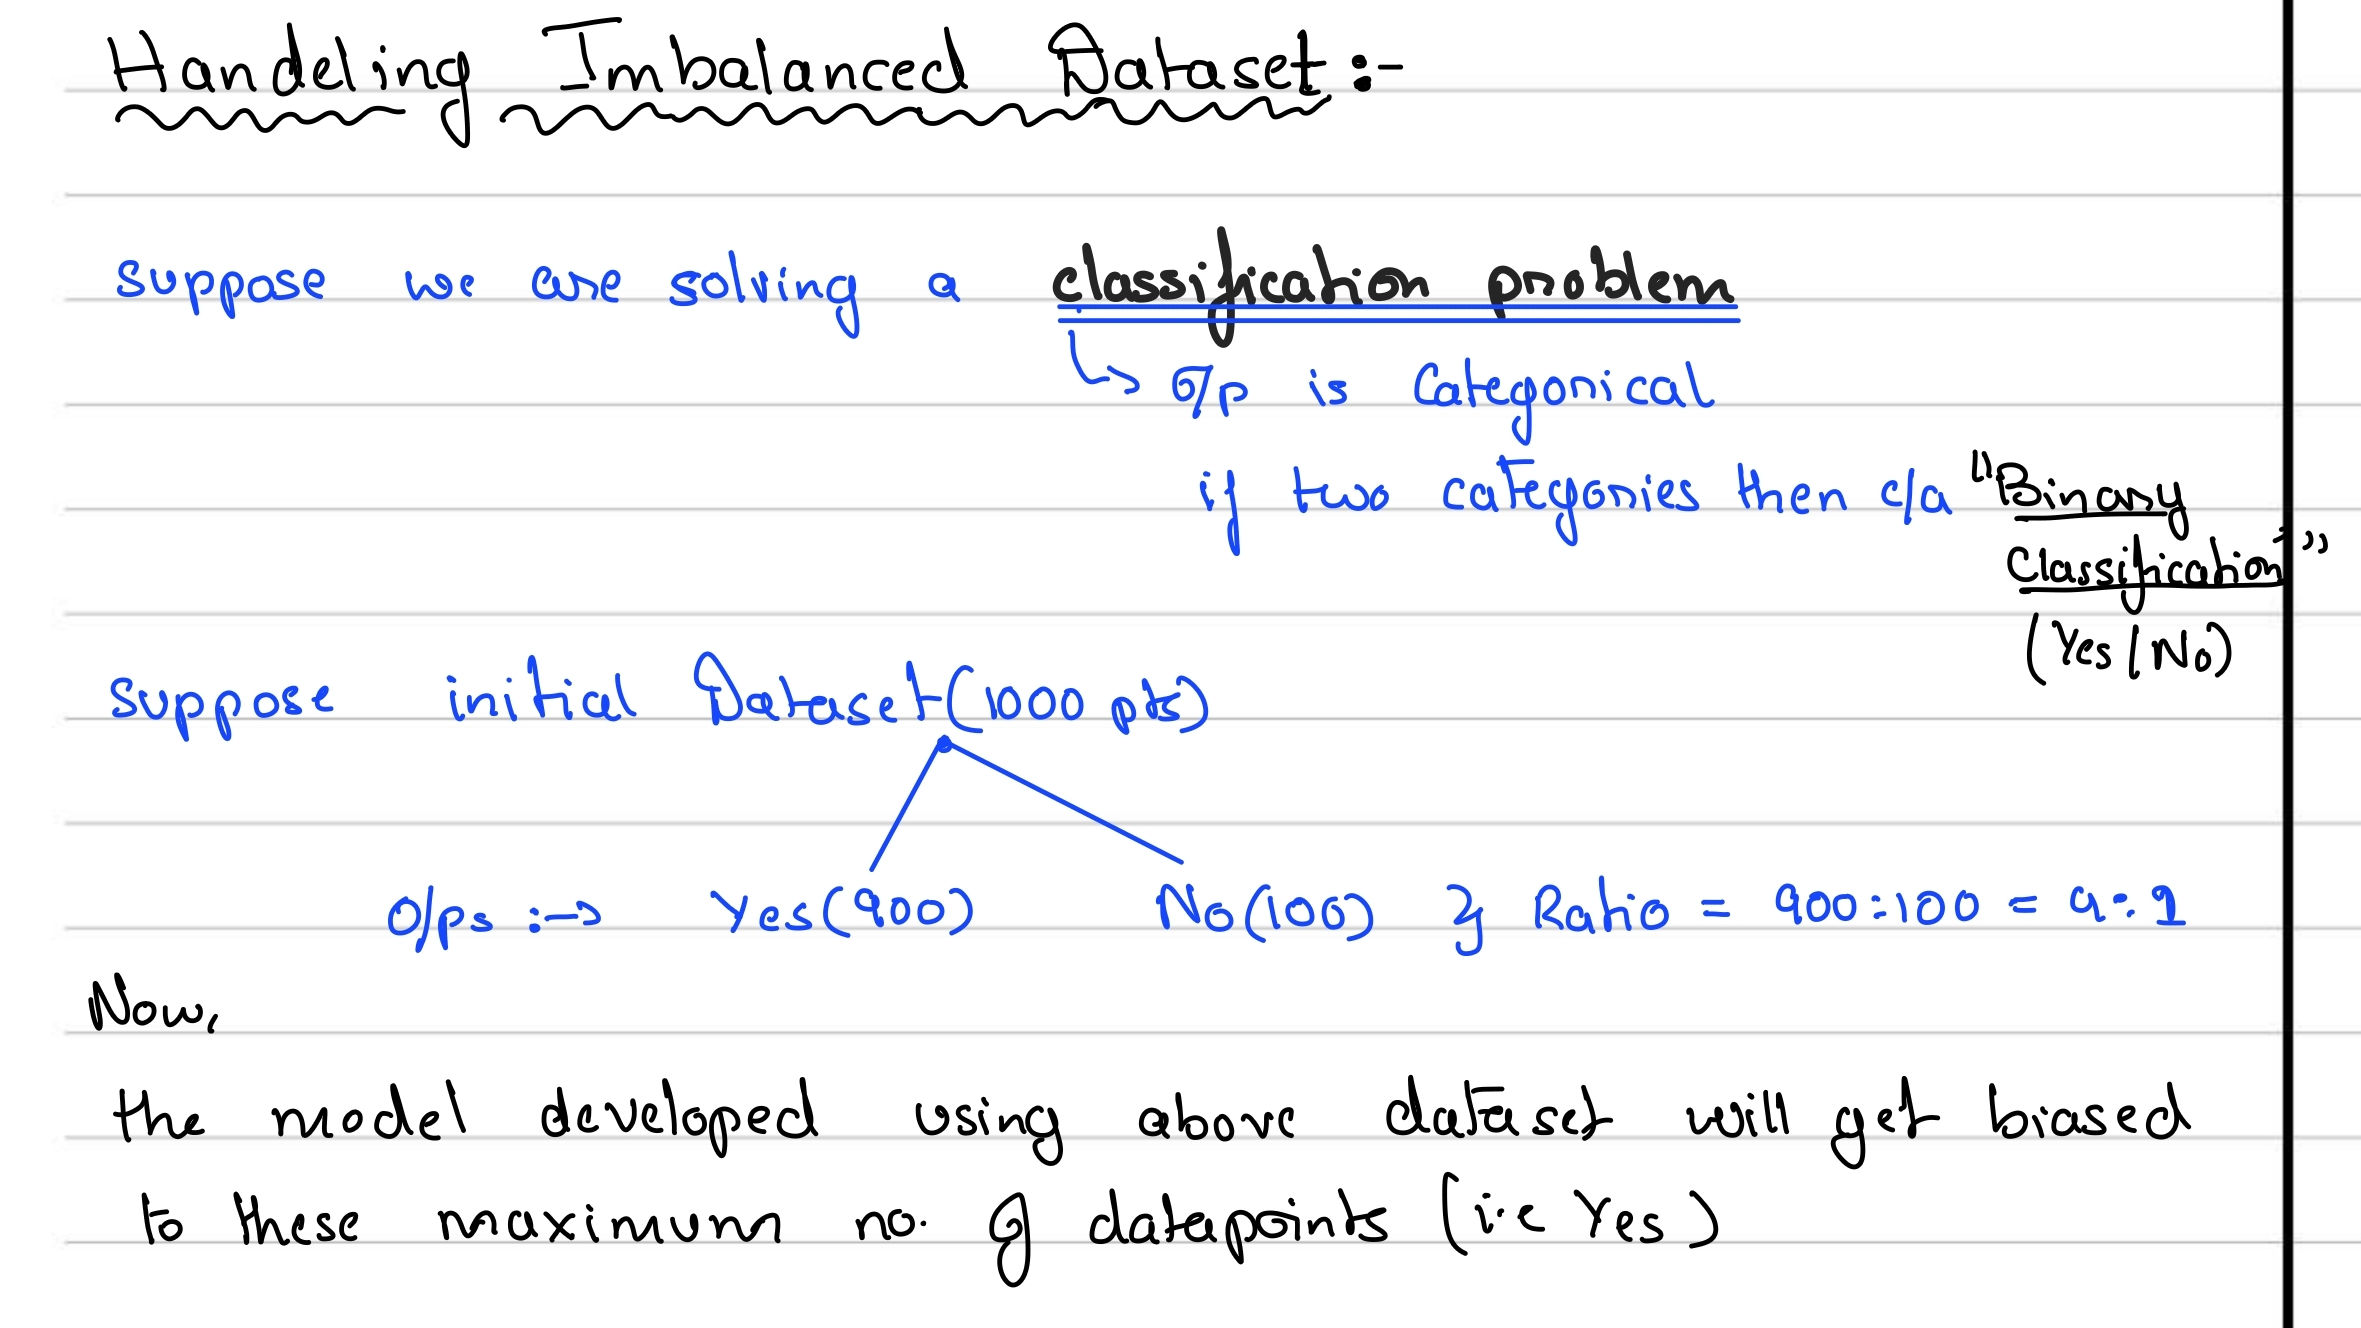

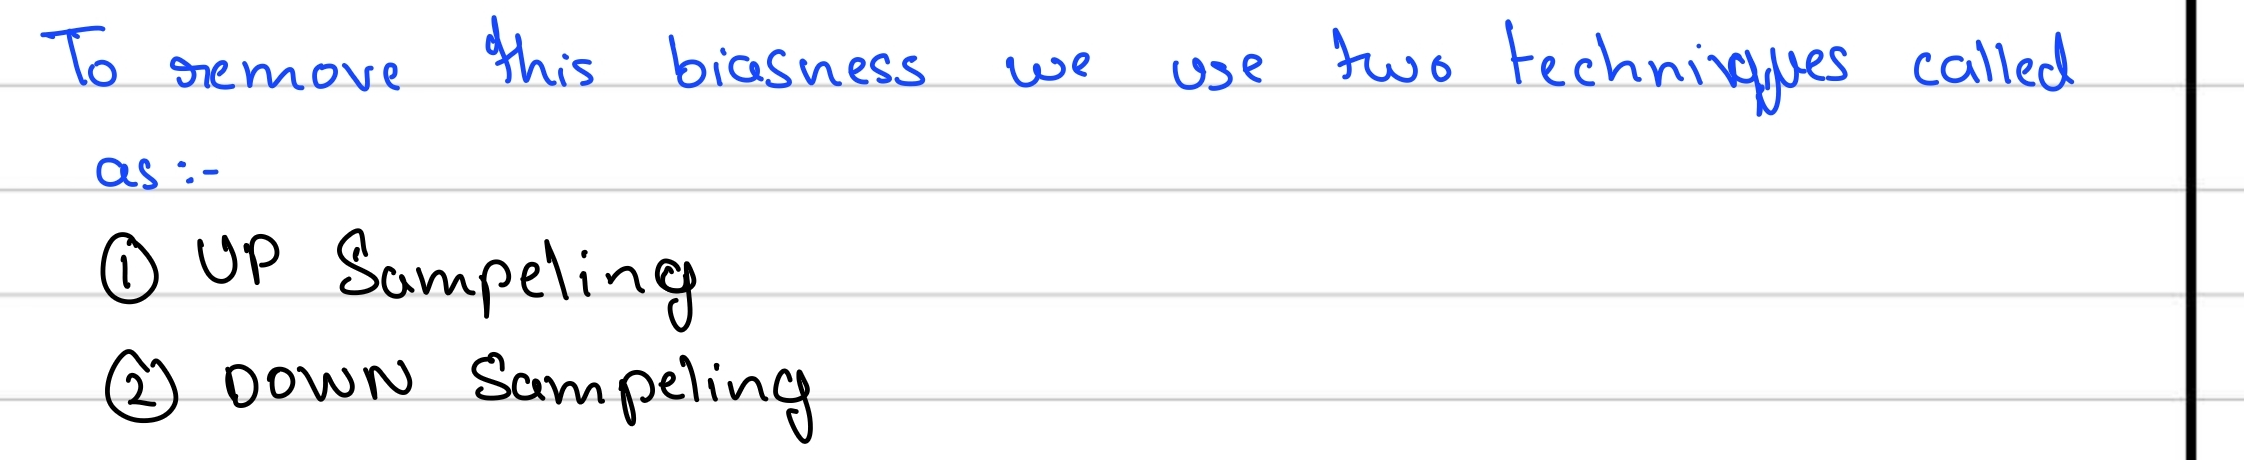

In [3]:
import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(123)

#creating dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio) #900 data point in class 0
n_class_1 = n_samples-n_class_0 #100 datapoints in class 1

In [4]:
#creating dataframe with imbalanced dataset
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target': [0]*n_class_0
})
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target': [1]*n_class_1
})

#now combining above dataframes
df = pd.concat([class_0,class_1]).reset_index(drop=True)
print(df.head())
print(df.tail())
print(df['target'].value_counts())

   feature_1  feature_2  target
0  -1.085631   0.551302       0
1   0.997345   0.419589       0
2   0.282978   1.815652       0
3  -1.506295  -0.252750       0
4  -0.578600  -0.292004       0
     feature_1  feature_2  target
995   1.376371   2.845701       1
996   2.239810   0.880077       1
997   1.131760   1.640703       1
998   2.902006   0.390305       1
999   2.697490   2.013570       1
target
0    900
1    100
Name: count, dtype: int64


## 2.1)- UP Sampeling
in case of we are going to increase the no of minority values i.e 1

In [5]:
#UP Sampeling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]


In [8]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
         replace=True, #sample with replacement
        n_samples=len(df_majority),
        random_state=42)
print(df_minority_upsampled.shape)

#concatinating the new upsampled dataset
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled['target'].value_counts()

(900, 3)


target
0    900
1    900
Name: count, dtype: int64

## 2.2)- DOWN Sampeling

In [11]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

df_majority_downsampled = resample(df_majority,
         replace=False, #becausee we need to reduce datapoints
        n_samples=len(df_minority),
        random_state=42)

print(df_majority_downsampled.shape)

#concatinating 
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

print(df_downsampled.target.value_counts())

#downsampeling is bad cuz we are loosing data points

(100, 3)
target
1    100
0    100
Name: count, dtype: int64


## 2.3)- SMOTE (Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.
using library: imblearn
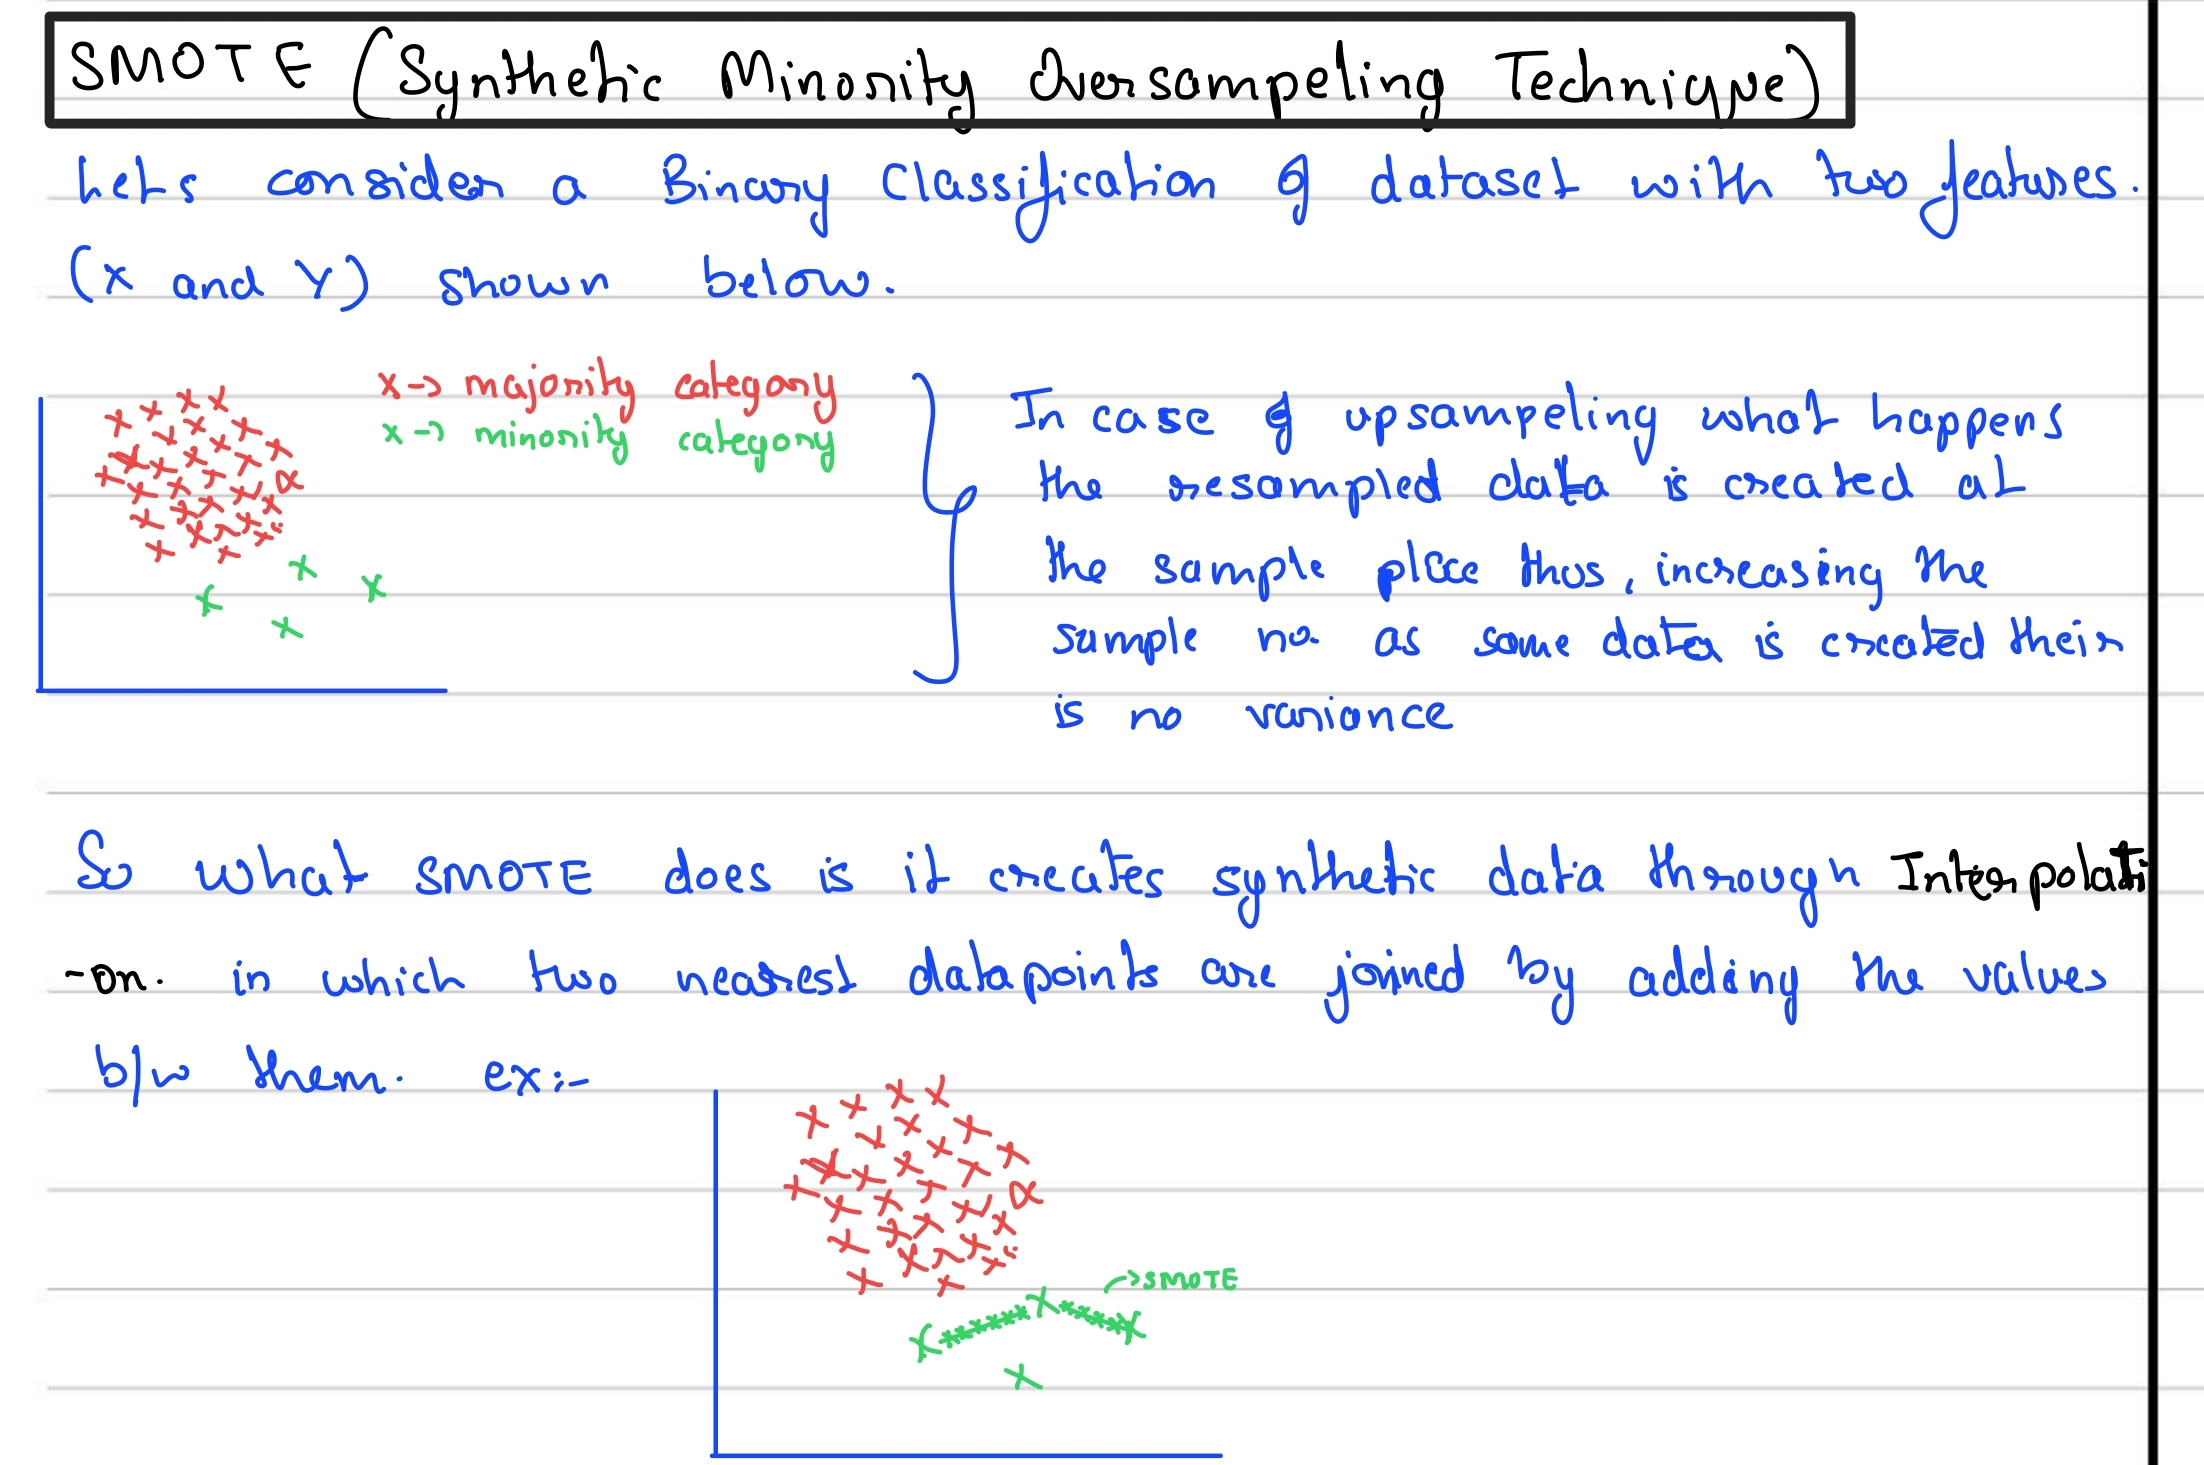

In [26]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,
                   n_features=2,
                   n_redundant=0,
                   n_clusters_per_class=1,
                   weights=[0.90],
                   random_state=12)
# creating dataframes to visualize
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
#concatinating 
final_df = pd.concat([df1,df2],axis=1)

#counting categorical data
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

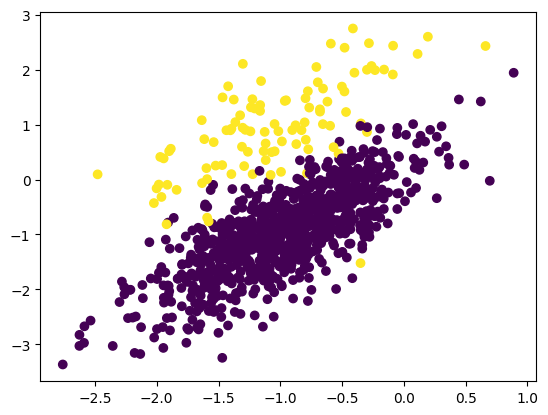

In [34]:
import matplotlib.pyplot as plt
plt.scatter(final_df.f1,final_df['f2'],c=final_df['target'])

(1800, 2)
(1800,)
no. of zeros= 900


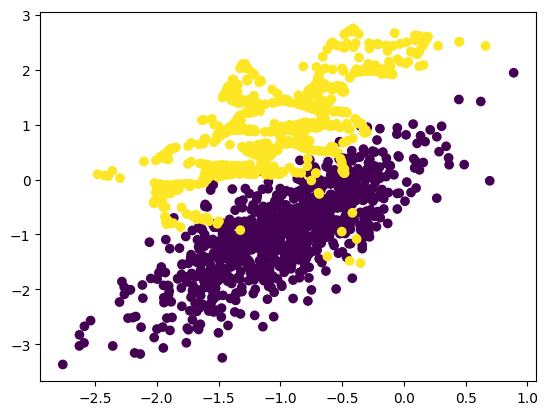

In [58]:
from imblearn.over_sampling import SMOTE

##applying SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df.target)
print(x.shape)
print(y.shape)
print(f"no. of zeros= {oversampled_df[oversampled_df['target']==0][['target']].count()[0]}")

# creating dataframes to visualize
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
#concatinating 
oversampled_df = pd.concat([df1,df2],axis=1)  
plt.scatter(oversampled_df.f1,oversampled_df.f2,c=oversampled_df.target)

In [56]:
oversampled_df[oversampled_df['target']==0][['target']].count()[0]

900

# -------------------------------------------------------------------------------------------------------------

# 3)- Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

## 3.1- Linear  Interpolation

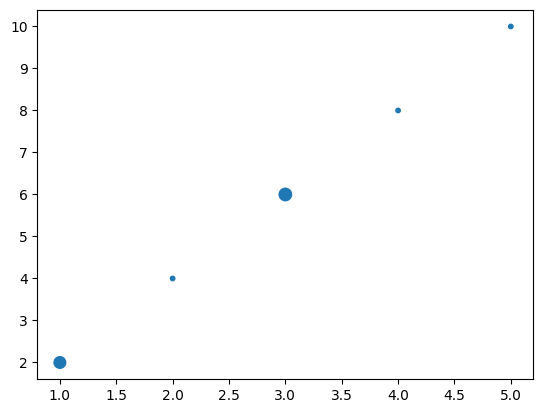

In [67]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

#sizes =10* np.random.randint(1,10,5)
plt.scatter(x,y,#s=sizes)

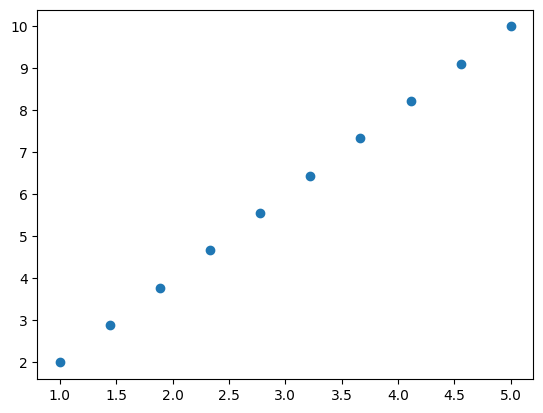

In [72]:
#now performing Linear Interpolation and filing the data b/w points

x_new = np.linspace(1,5,10) #create 10 evenly spaced nos. between 1 to 5

#creating y interpolation points using x_new
y_interp = np.interp(x_new,x,y) #One-dimensional linear interpolation for monotonically increasing sample points.

#plotting
plt.scatter(x_new,y_interp)

In [69]:
np.linspace(1,5,10) 

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

## 3.2- Cubic Interpolation With Scipy
curved graph
using: scipy.interpolate.interp1d

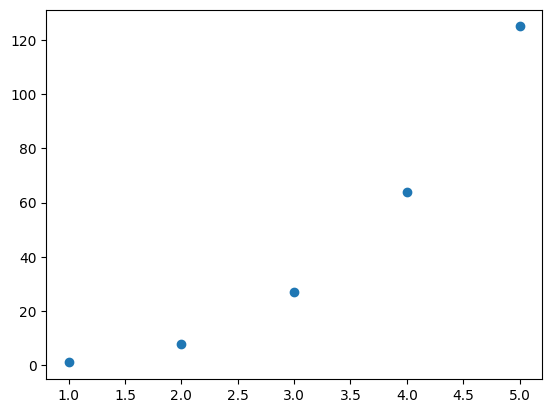

In [73]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

plt.scatter(x,y)

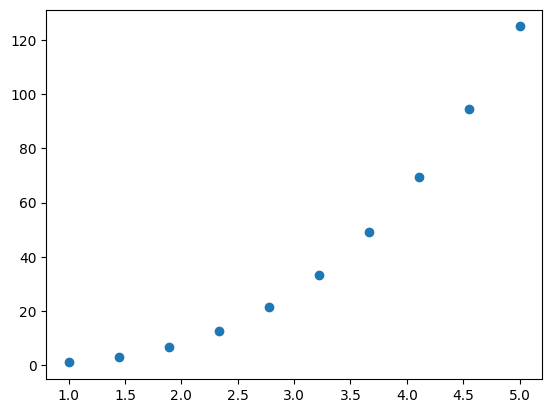

In [75]:
## Now interpolating
from scipy.interpolate import interp1d

## creating a cubic interpolation function 
f = interp1d(x,y,kind='cubic')

## interpolateing the data
x_new = np.linspace(1,5,10)
y_interp = f(x_new)

##plotting 
plt.scatter(x_new,y_interp)

## 3.3- Polynomial Interpolation

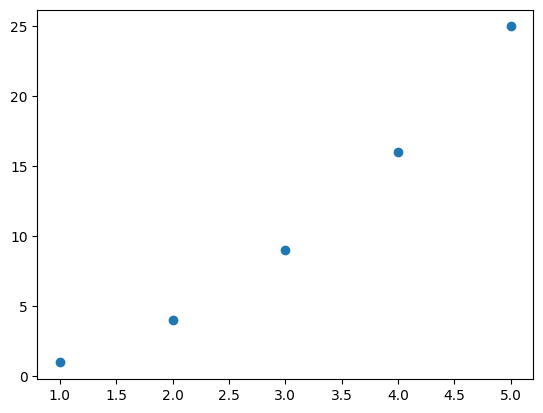

In [78]:
#creating sample data
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

plt.scatter(x,y)

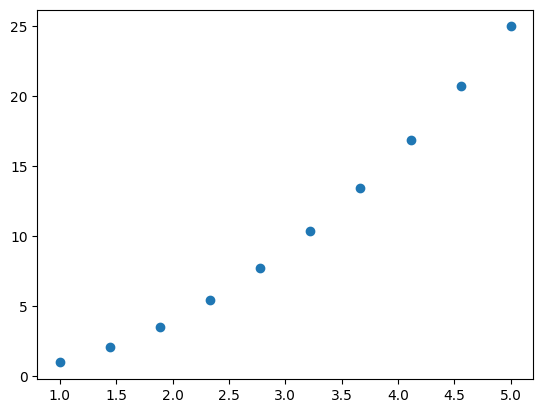

In [81]:
#intepolating the data using numpy
p = np.polyfit(x,y,2) #2-degree of polynomial

x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)
plt.scatter(x_new,y_interp)

# -------------------------------------------------------------------------------------------------------------

# 4)- Percentile & Quartiles
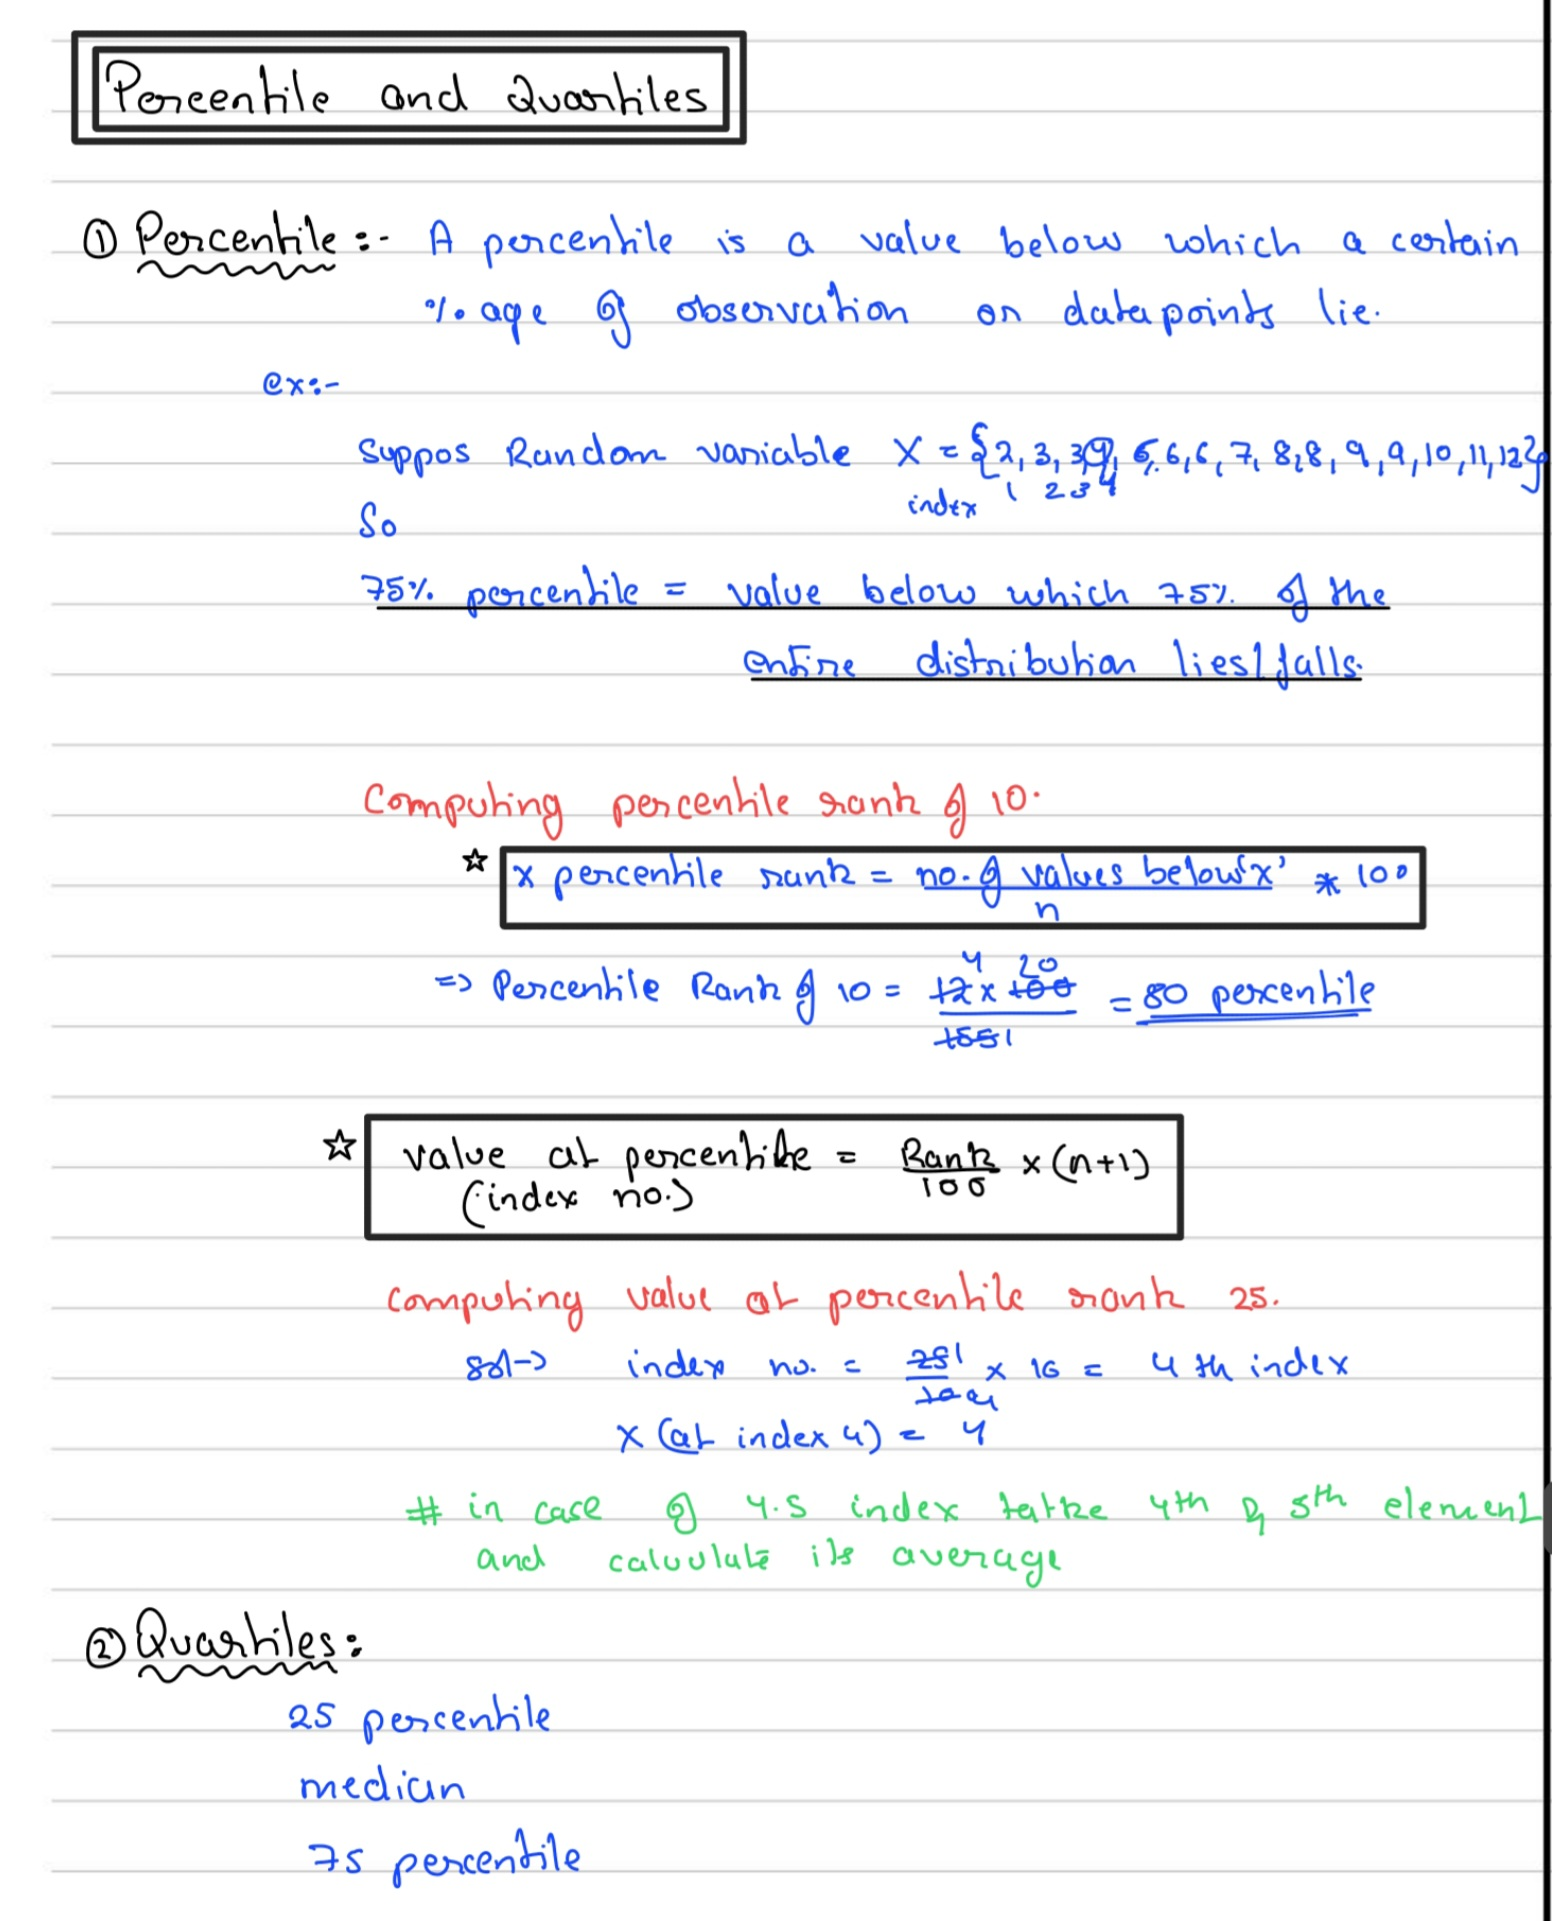